In [1]:
import pandas as pd 
import json
import os
import requests
from rdkit import Chem
from rdkit.Chem.PandasTools import LoadSDF

cur_dir = os.getcwd()

# Parsing Raw Data

### CovInDB dataset 

In [10]:
CovInDB_dir = "../raw_data/CovInDB/"
os.chdir(CovInDB_dir)
df = pd.concat([pd.read_csv(f) for f in os.listdir()])
os.chdir(cur_dir)

In [5]:
df = df.drop_duplicates(subset=["InChI"])
df.to_csv("CovInDB_parsed.csv", index = False)

### Drugbank dataset 

In [17]:
df = pd.read_csv("../raw_data/drugbank/structure_links.csv")
df = df.drop_duplicates(subset=['DrugBank ID'])
df = df.dropna(subset=["SMILES"])
df.to_csv("drugank_parsed.csv")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11297 entries, 0 to 11911
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DrugBank ID           11297 non-null  object 
 1   Name                  11297 non-null  object 
 2   CAS Number            7752 non-null   object 
 3   Drug Groups           11297 non-null  object 
 4   InChIKey              11297 non-null  object 
 5   InChI                 11297 non-null  object 
 6   SMILES                11297 non-null  object 
 7   Formula               11297 non-null  object 
 8   KEGG Compound ID      2313 non-null   object 
 9   KEGG Drug ID          2011 non-null   object 
 10  PubChem Compound ID   8712 non-null   float64
 11  PubChem Substance ID  8753 non-null   float64
 12  ChEBI ID              5209 non-null   float64
 13  ChEMBL ID             7819 non-null   object 
 14  HET ID                6021 non-null   object 
 15  ChemSpider ID      

In [ ]:
# db_dir = "../raw_data/drugbank/"
# os.chdir(db_dir)
# !obabel *.xyz -osmi -m
# # !mv *.mol ../../parsed_data/drugbank/
# os.chdir(cur_dir)

# Parsing parsed data

In [2]:
# covindb 
df_covindb = pd.read_csv("../parsed_data/CovInDB/CovInDB_parsed.csv")
df_covindb = df_covindb[["Inhibitor_id", "SMILES", "InChI", "InChI_Key"]].rename({"Inhibitor_id": "ID"}, axis=1)
df_covindb["InChI_Key_Reduced"] = df_covindb.InChI_Key.apply(lambda x: x.split("-")[0])
df_covindb["covalent"] = 1
df_covindb = df_covindb.drop_duplicates(subset=["InChI_Key_Reduced"])

# drugbank
df_drugbank = pd.read_csv("../parsed_data/drugbank/drugank_parsed.csv")
df_drugbank = df_drugbank[["DrugBank ID", "InChIKey", "InChI", "SMILES"]].rename({"DrugBank ID": "ID", "InChIKey": "InChI_Key"}, axis=1)
df_drugbank["InChI_Key_Reduced"] = df_drugbank.InChI_Key.apply(lambda x: x.split("-")[0])
df_drugbank["covalent"] = 0
df_drugbank = df_drugbank.drop_duplicates(subset=["InChI_Key_Reduced"])

# combine, drop duplicates 
df = pd.concat([df_covindb, df_drugbank], join="inner")
df = df.drop_duplicates(subset=["InChI_Key_Reduced"], keep="first")
df

,ID,SMILES,InChI,InChI_Key,InChI_Key_Reduced,covalent
0,CI003161,COc1ccc(C(Nc2ccccn2)c2c(C)[nH]c3ccccc23)cc1,InChI=1S/C22H21N3O/c1-15-21(18-7-3-4-8-19(18)2...,RCIGOSNBBDUIQM-UHFFFAOYSA-N,RCIGOSNBBDUIQM,1
1,CI003162,Cc1ccc(C(Nc2ccccn2)c2c(C)[nH]c3ccccc23)cc1,InChI=1S/C22H21N3/c1-15-10-12-17(13-11-15)22(2...,CWBHEIWNECIDTB-UHFFFAOYSA-N,CWBHEIWNECIDTB,1
2,CI003163,COc1cccc(C(Nc2ccccn2)c2c(C)[nH]c3ccccc23)c1,InChI=1S/C22H21N3O/c1-15-21(18-10-3-4-11-19(18...,JHPOKNXDPYFIHU-UHFFFAOYSA-N,JHPOKNXDPYFIHU,1
3,CI003164,Cc1[nH]c2ccccc2c1C(Nc1ccccn1)c1cccc(Br)c1,InChI=1S/C21H18BrN3/c1-14-20(17-9-2-3-10-18(17...,VGXNPIDAUCMBNF-UHFFFAOYSA-N,VGXNPIDAUCMBNF,1
4,CI003165,Cc1[nH]c2ccccc2c1C(Nc1ccccn1)c1ccc(Br)cc1,InChI=1S/C21H18BrN3/c1-14-20(17-6-2-3-7-18(17)...,IRADSKWXOJBRMS-UHFFFAOYSA-N,IRADSKWXOJBRMS,1
...,...,...,...,...,...,...
11292,DB16735,NCC1=CC(=NC(OC2=CC(=CC=C2)C(=O)N2C[C@@H](O)[C@...,InChI=1S/C18H17F4N3O3/c19-13-8-25(9-14(13)26)1...,ODGXXYXJORZPHE-ZIAGYGMSSA-N,ODGXXYXJORZPHE,0
11293,DB16737,CC(=O)NCC(=O)N[C@@H](CCC(N)=O)C(=O)N[C@@H](CC1...,InChI=1S/C31H39N9O6S/c1-18(41)36-17-26(43)37-2...,ZEPMYXYJCBQSLH-VABKMULXSA-N,ZEPMYXYJCBQSLH,0
11294,DB16739,CC(C)C1=CC=C2N(CC3=CC=C(Cl)C=C3)C(CC(C)(C)C(O)...,InChI=1S/C27H34ClNO2S/c1-17(2)19-10-13-22-21(1...,QAOAOVKBIIKRNL-UHFFFAOYSA-N,QAOAOVKBIIKRNL,0
11295,DB16741,[H][C@@]1(OB(O[C@]1([H])[C@H](O)CO)[C@H](CC(C)...,InChI=1S/C25H35BN4O8/c1-15(2)10-21(26-37-22(19...,QDMRNLRJDHCHLB-DNNBANOASA-N,QDMRNLRJDHCHLB,0


### get the drugbank sdf data and combine it with aiment data

In [ ]:
df_aimnet_db_dir = "../aimnet/drugbank-aim-data/"

file_list_db = { 
    "ID": [i.split(".")[0] for i in os.listdir(df_aimnet_db_dir) if i.endswith(".aim")],
    "data": [json.load(open(df_aimnet_db_dir + i)) for i 
    in os.listdir(df_aimnet_db_dir) if i.endswith(".aim")]
    }
file_list_db = pd.DataFrame(file_list_db)
file_list_db

In [ ]:
df_aimnet_db = None

for f in os.listdir(df_aimnet_db_dir):
    if df_aimnet_db is not None and f.endswith(".sdf"):
        try:
            df_aimnet_db = pd.concat([df_aimnet_db, LoadSDF(df_aimnet_db_dir + f)])
        except:
            continue
    elif df_aimnet_db is None and f.endswith(".sdf"):
        df_aimnet_db = LoadSDF(df_aimnet_db_dir + f)
    else:
        continue

df_aimnet_db

In [5]:
df_aimnet_db_complete = df_aimnet_db.merge(file_list_db, how="inner", on="ID")
df_aimnet_db_complete = df_aimnet_db_complete[["DRUGBANK_ID", "data"]].rename({"DRUGBANK_ID": "ID"}, axis=1)
df_aimnet_db_complete.head(1)

,ID,data
0,DB03068,"{'energy': [-22692.583090445914, -22701.567400..."


### get the covindb data and combine it with aiment data

In [4]:
df_aimnet_covindb_dir = "../aimnet/covalentdb-aim/"

file_list_covindb = { 
    "ID": [i.split(".")[0] for i in os.listdir(df_aimnet_covindb_dir) if i.endswith(".aim")],
    "data": [json.load(open(df_aimnet_covindb_dir + i)) for i 
    in os.listdir(df_aimnet_covindb_dir) if i.endswith(".aim")]
    }
file_list_covindb = pd.DataFrame(file_list_covindb)
file_list_covindb

,ID,data
0,CI000002,"{'energy': [-30724.121691770026, -30732.261561..."
1,CI000003,"{'energy': [-17610.805361681974, -17620.120644..."
2,CI000004,"{'energy': [-20700.430856940104, -20709.262757..."
3,CI000005,"{'energy': [-16568.80208214349, -16577.7528959..."
4,CI000006,"{'energy': [-21875.852580889386, -21883.973873..."
...,...,...
6630,CI006857,"{'energy': [-53488.453841354814, -53494.667059..."
6631,CI006858,"{'energy': [-42558.38046772025, -42565.3437281..."
6632,CI006860,"{'energy': [-59361.785366631244, -59370.073484..."
6633,CI006861,"{'energy': [-60791.69480029223, -60798.7997963..."


,ID,E_tot,fmax,Converged,E_rel(kcal/mol),ROMol
0,CI000002,-1131.6791409251757,0.002999494783580303,True,0.0,
0,CI000003,-649.2387159525792,0.0029633401427417994,True,0.0,
0,CI000004,-762.3160142193716,0.0029243514873087406,True,0.0,
0,CI000005,-610.8550893066312,0.0023108990862965584,True,0.0,
0,CI000006,-806.422486933473,0.002854739548638463,True,0.0,
...,...,...,...,...,...,...
0,CI006857,-1971.1652211302146,0.00279992469586432,True,0.0,
0,CI006858,-1568.4601870106248,0.002959307748824358,True,0.0,
0,CI006860,-2186.735645785425,0.0029914577025920153,True,0.0,
0,CI006861,-2240.344963263708,0.0022317422553896904,True,0.0,

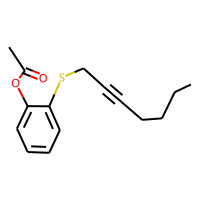
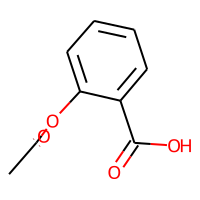
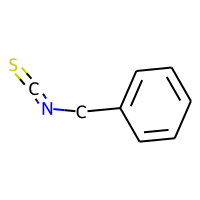
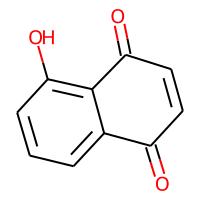
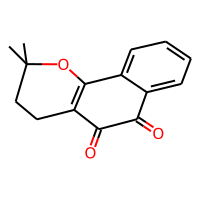
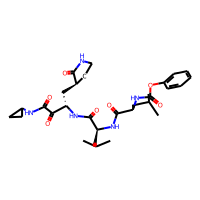
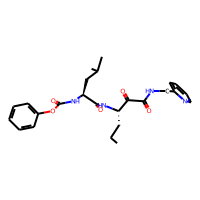
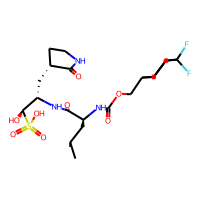
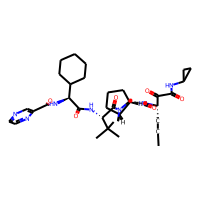
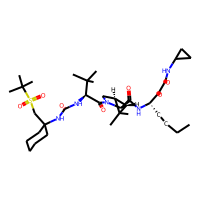

In [5]:
df_aimnet_covindb = None

for f in os.listdir(df_aimnet_covindb_dir):
    if df_aimnet_covindb is not None and f.endswith(".sdf"):
        try:
            df_aimnet_covindb = pd.concat([df_aimnet_covindb, LoadSDF(df_aimnet_covindb_dir + f)])
        except:
            continue
    elif df_aimnet_covindb is None and f.endswith(".sdf"):
        df_aimnet_covindb = LoadSDF(df_aimnet_covindb_dir + f)
    else:
        continue

df_aimnet_covindb

In [8]:
df_aimnet_covindb_complete = df_aimnet_covindb.merge(file_list_covindb, how="inner", on="ID")
df_aimnet_covindb_complete = df_aimnet_covindb_complete[["ID", "data"]]
df_aimnet_covindb_complete.head(1)

,ID,data
0,CI000002,"{'energy': [-30724.121691770026, -30732.261561..."


In [27]:

df_final = df.merge(df_aimnet_db_complete, how="left", on=["ID"]).merge(df_aimnet_covindb_complete, how="left", on=["ID"])
df_final['aimnet_data'] = df_final.data_x.fillna(df_final.data_y)
df_final = df_final.drop(["data_x", "data_y"], axis=1).dropna()
df_final.covalent.value_counts()

0    8763
1    6395
Name: covalent, dtype: int64

# Parsing Rowley test data

In [8]:
df_rowley_dir = "../aimnet/validation/"

def get_InChIKey(pubchem_id):
    return requests.get(f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{pubchem_id}/property/InChIKey/TXT").text.strip('\n')

def open_json(file):
    try:
        file = json.load(open(file))
        return file
    except: 
        print(f"{file} could not be processed")

def convert_to_int(x):
    try:
        return int(x)
    except:
        return x

file_list_db = { 
    "ID": [i.split(".")[0] for i in os.listdir(df_rowley_dir) if i.endswith(".aim")],
    "data": [open_json(df_rowley_dir + i) for i in os.listdir(df_rowley_dir) if i.endswith(".aim")]
    }
file_list_db = pd.DataFrame(file_list_db)
file_list_db.ID = file_list_db.ID.apply(lambda x: convert_to_int(x))
file_list_db

,ID,data
0,ACWQBUSCFPJUPN-HWKANZROSA-N,"{'energy': [-7338.636844303677, -7348.17666869..."
1,AEDMWQPFIPNFCS-DBRKOABJSA-N,"{'energy': [-31181.71047908271, -31191.1769488..."
2,AELCINSCMGFISI-UHFFFAOYSA-N,"{'energy': [-10972.895419003515, -10980.857564..."
3,AHLBNYSZXLDEJQ-FWEHEUNISA-N,"{'energy': [-42578.27075238381, -42586.2033493..."
4,AINNQKIVZOTQBB-KGLIPLIRSA-N,"{'energy': [-35091.98788618556, -35100.5043041..."
...,...,...
291,ZUEKKUYIXILDAF-UHFFFAOYSA-N,"{'energy': [-27814.947317257785, -27824.186187..."
292,ZUHVYHQVJYIHPN-KHXPSBENSA-N,"{'energy': [-65657.77392918145, -65665.4612514..."
293,ZVLOPMNVFLSSAA-XEPQRQSNSA-N,"{'energy': [-23982.948584546037, -23991.937472..."
294,ZWEXEKJLDHNLLA-UHFFFAOYSA-N,"{'energy': [-21438.067211180245, -21446.292763..."


In [ ]:
# parsing using pubchemIDS

# df_rowley = pd.read_csv("../parsed_data/RowleyTestSet.csv")
# df = df_rowley[df_rowley.covalent == 1]
# df.PubChemID = df.PubChemID.apply(lambda x: int(x))
# df = df.rename({"PubChemID": "ID"}, axis=1) 
# df = df.merge(file_list_db, how="inner", on=["ID"])
# df.to_pickle("RowleyTestWithAimNet.pkl")

In [10]:
df_rowley = pd.read_csv("../parsed_data/RowleyTestSet.csv")
df = df_rowley[df_rowley.covalent == 1]
df.PubChemID = df.PubChemID.apply(lambda x: int(x))
df["ID"] = df.PubChemID.apply(lambda x: get_InChIKey(x))
df = df.merge(file_list_db, how="inner", on=["ID"])
df.to_pickle("RowleyTestWithAimNet.pkl")

/tmp/ipykernel_414/1240947463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PubChemID = df.PubChemID.apply(lambda x: int(x))
/tmp/ipykernel_414/1240947463.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ID"] = df.PubChemID.apply(lambda x: get_InChIKey(x))


,PubChemID,Type,SMILES,covalent,ID,data
0,42601513,general,CC(C)C1C=CC(=O)NCCC=CC(C(=O)N1)NC(=O)C(C(C)C)N...,1,RUWSLQOIGKYPEZ-YPXRAQKDSA-N,"{'energy': [-45167.59205465663, -45175.2654399..."
1,5311211,general,CCCCCC=CC=C1C(C=CC1=O)CC=CCCCC(=O)O,1,VHRUMKCAEVRUBK-GODQJPCRSA-N,"{'energy': [-27277.861586507915, -27285.990118..."
2,265237,general,CC1=C(C(=O)OC(C1)C(C)C2CCC3C2(CCC4C3CC5C6(C4(C...,1,DBRXOUCRJQVYJQ-CKNDUULBSA-N,"{'energy': [-41851.743920827495, -41860.134747..."
3,6438503,general,CC(=CCC1=C(C=CC(=C1O)C(=O)C=CC2=CC=C(C=C2)O)OC)C,1,XDKYBPGIBVMHHB-KPKJPENVSA-N,"{'energy': [-30260.099618052005, -30267.389340..."
4,5318517,general,CC12CCC(C(C1CCC(=C)C2CC=C3C(COC3=O)O)(C)CO)O,1,BOJKULTULYSRAS-OTESTREVSA-N,"{'energy': [-31397.407739052338, -31405.995764..."
...,...,...,...,...,...,...
223,156414,acrylamide,C=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C...,1,OMZCMEYTWSXEPZ-UHFFFAOYSA-N,"{'energy': [-54034.828548650534, -54041.438022..."
224,10184653,acrylamide,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,1,ULXXDDBFHOBEHA-CWDCEQMOSA-N,"{'energy': [-54034.401542870386, -54041.293830..."
225,71496458,acrylamide,CN1C=C(C2=CC=CC=C21)C3=NC(=NC=C3)NC4=C(C=C(C(=...,1,DUYJMQONPNNFPI-UHFFFAOYSA-N,"{'energy': [-44010.584225375074, -44015.714809..."
226,6918296,acrylamide,CC12CCC3C(C1CCC2C(=O)NC4=C(C=CC(=C4)C(F)(F)F)C...,1,JWJOTENAMICLJG-QWBYCMEYSA-N,"{'energy': [-51764.6384584139, -51773.03249463..."


In [4]:
df

,ID,Type,SMILES,covalent
0,42601513,general,CC(C)C1C=CC(=O)NCCC=CC(C(=O)N1)NC(=O)C(C(C)C)N...,1
1,5311211,general,CCCCCC=CC=C1C(C=CC1=O)CC=CCCCC(=O)O,1
2,265237,general,CC1=C(C(=O)OC(C1)C(C)C2CCC3C2(CCC4C3CC5C6(C4(C...,1
3,6438503,general,CC(=CCC1=C(C=CC(=C1O)C(=O)C=CC2=CC=C(C=C2)O)OC)C,1
4,5318517,general,CC12CCC(C(C1CCC(=C)C2CC=C3C(COC3=O)O)(C)CO)O,1
...,...,...,...,...
240,156414,acrylamide,C=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C...,1
241,10184653,acrylamide,CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(...,1
242,71496458,acrylamide,CN1C=C(C2=CC=CC=C21)C3=NC(=NC=C3)NC4=C(C=C(C(=...,1
243,6918296,acrylamide,CC12CCC3C(C1CCC2C(=O)NC4=C(C=CC(=C4)C(F)(F)F)C...,1
